<h1>Projeto Final Curso Big Data Science</h1>

O objetivo do projeto é encontrar a relação entre a nota da redação com outras provas do ENEM e fatores socieconômicos. O objetivo é identificar como as outras competências do aluno se relacionam com a noda da redação e se tem mais ou menos importância do que fatores socioeconômicos.

<h2>Importando as bibliotecas</h2>

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import io
import sys
import os
sns.set()

<h2>Indicação do caminho para os dados no máquina</h2>

Nessa o caminho para os arquivos com as notas do ENEM. Eles foram fragmentados para que pudesse ser processados e para evitar overfiting dos dados

In [2]:
path = "/home/marcus-fortes/semantix-big-data-science/trabalho-final/microdados_enem_2021/DADOS/splited_data/"

In [3]:
splited_files = os.listdir(path)

<h3>Aqui está a lista de arquivos particionados. A partir dela pode-se encontrar o pedaço do aquivo para a analise</h3>

In [4]:
splited_files

['file_part_23',
 'file_part_05',
 'file_part_26',
 'file_part_17',
 'file_part_07',
 'file_part_24',
 'file_part_03',
 'file_part_16',
 'file_part_08',
 'file_part_27',
 'file_part_11',
 'file_part_10',
 'file_part_30',
 'file_part_21',
 'file_part_02',
 'file_part_28',
 'file_part_01',
 'file_part_00',
 'file_part_20',
 'file_part_22',
 'file_part_15',
 'file_part_25',
 'file_part_04',
 'file_part_12',
 'file_part_14',
 'file_part_06',
 'file_part_19',
 'file_part_09',
 'file_part_32',
 'file_part_29',
 'file_part_33',
 'file_part_13',
 'file_part_31',
 'file_part_18']

<h2>Leitura de arquivos</h2>

In [5]:
df_enem=pd.read_csv("../file_part_00.csv",encoding='latin-1',sep=";")

<h3>Analise exploratória</h3>

In [6]:
df_enem.head(10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B
5,210052391248,2021,10,F,1,3,1,1,9,1,...,A,A,A,A,A,A,B,A,A,B
6,210052615524,2021,9,F,0,3,1,1,6,1,...,B,A,A,B,B,A,C,A,A,B
7,210054368957,2021,4,F,1,1,1,1,1,1,...,B,A,A,C,B,A,D,B,B,B
8,210053417016,2021,8,F,1,3,1,2,0,2,...,B,A,A,B,A,A,B,A,A,B
9,210051128744,2021,4,F,1,3,1,2,0,2,...,B,A,B,C,B,A,C,A,A,B


In [7]:
df_enem.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [8]:
df_enem.describe(include='all')

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
count,9.999900e+04,99999.0,99999.000000,99999,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,5,5,2,5,2,2,5,2,5,2
top,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,...,A,A,A,B,A,A,D,A,A,B
freq,NaN,NaN,NaN,70054,NaN,NaN,NaN,NaN,NaN,NaN,...,54558,97798,81457,69988,82266,81709,30148,87154,47817,89332
mean,2.100527e+11,2021.0,4.450045,NaN,1.027610,2.100371,1.026750,1.656497,1.723987,1.510425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.979540e+05,0.0,3.263393,NaN,0.346713,1.011542,0.192964,0.654626,3.450239,0.592415,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.100510e+11,2021.0,1.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.100519e+11,2021.0,2.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.100527e+11,2021.0,3.000000,NaN,1.000000,2.000000,1.000000,2.000000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.100536e+11,2021.0,5.000000,NaN,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_enem["TX_RESPOSTAS_CH"].head(10)

0    BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB
1    ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE
2                                              NaN
3    CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC
4    CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC
5                                              NaN
6    BBDDABEBACCBBAECEBABAEEBEDBAEBADAEEDAEDDCABBE
7                                              NaN
8    BDBCDAAEEBEAABEDEBAACCCCBABCCAAEBBCABAEAEDEDA
9    EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD
Name: TX_RESPOSTAS_CH, dtype: object

In [10]:
df_enem["NU_NOTA_LC"].head(10)

0    472.6
1    498.3
2      NaN
3    638.9
4    457.6
5      NaN
6    420.4
7      NaN
8    450.7
9    494.6
Name: NU_NOTA_LC, dtype: float64

<h3>Limpeza de dados</h3>

In [11]:
data_enem = df_enem.drop(['NU_INSCRICAO','TP_SEXO','TP_ESTADO_CIVIL','TP_COR_RACA','TP_NACIONALIDADE','TP_ESCOLA','TP_ENSINO','IN_TREINEIRO','CO_MUNICIPIO_ESC','NO_MUNICIPIO_ESC','CO_UF_ESC','SG_UF_ESC','TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC','TP_SIT_FUNC_ESC','CO_MUNICIPIO_PROVA','NO_MUNICIPIO_PROVA','CO_UF_PROVA','SG_UF_PROVA', 'TX_RESPOSTAS_CN','TX_RESPOSTAS_CH','TX_RESPOSTAS_LC','TX_RESPOSTAS_MT','TP_LINGUA','TX_GABARITO_CN','TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT','Q001','Q002','Q003','Q004','Q005','Q006','Q007','Q008','Q009','Q010','Q011','Q012','Q013','Q014','Q015','Q016','Q017','Q018','Q019','Q020','Q021','Q022','Q023'],axis=1)

In [12]:
data_enem.isnull().sum()

NU_ANO                   0
TP_FAIXA_ETARIA          0
TP_ST_CONCLUSAO          0
TP_ANO_CONCLUIU          0
TP_PRESENCA_CN           0
TP_PRESENCA_CH           0
TP_PRESENCA_LC           0
TP_PRESENCA_MT           0
CO_PROVA_CN          21580
CO_PROVA_CH          18391
CO_PROVA_LC          18391
CO_PROVA_MT          21580
NU_NOTA_CN           21580
NU_NOTA_CH           18391
NU_NOTA_LC           18391
NU_NOTA_MT           21580
TP_STATUS_REDACAO    18391
NU_NOTA_COMP1        18391
NU_NOTA_COMP2        18391
NU_NOTA_COMP3        18391
NU_NOTA_COMP4        18391
NU_NOTA_COMP5        18391
NU_NOTA_REDACAO      18391
Q024                     0
Q025                     0
dtype: int64

In [13]:
data_enem.describe(include="all")

,NU_ANO,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,...,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q024,Q025
count,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,78419.000000,81608.000000,...,78419.000000,81608.000000,81608.000000,81608.000000,81608.000000,81608.000000,81608.000000,81608.000000,99999,99999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,B
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47817,89332
mean,2021.0,4.450045,1.656497,1.723987,0.785178,0.818528,0.818528,0.785178,914.305538,885.161124,...,535.646415,1.096964,124.360357,147.551956,122.128468,136.479757,126.123174,656.643711,NaN,NaN
std,0.0,3.263393,0.654626,3.450239,0.411892,0.388563,0.388563,0.411892,19.313878,23.139263,...,112.429210,0.663996,32.824113,45.118238,36.241546,39.066877,59.263046,189.747364,NaN,NaN
min,2021.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,909.000000,879.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,2021.0,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,910.000000,880.000000,...,443.900000,1.000000,120.000000,120.000000,100.000000,120.000000,100.000000,540.000000,NaN,NaN
50%,2021.0,3.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,911.000000,881.000000,...,513.500000,1.000000,120.000000,140.000000,120.000000,120.000000,140.000000,640.000000,NaN,NaN
75%,2021.0,5.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,912.000000,882.000000,...,614.000000,1.000000,140.000000,200.000000,140.000000,160.000000,180.000000,800.000000,NaN,NaN


In [14]:
data_enem_mv = data_enem.dropna(axis=0)

In [15]:
data_enem_mv.describe()

,NU_ANO,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,...,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,78232.0,78232.000000,78232.000000,78232.000000,78232.0,78232.0,78232.0,78232.0,78232.000000,78232.000000,...,78232.000000,78232.000000,78232.000000,78232.000000,78232.000000,78232.000000,78232.000000,78232.000000,78232.000000,78232.000000
mean,2021.0,4.034922,1.706463,1.450902,1.0,1.0,1.0,1.0,914.299059,884.980098,...,527.886034,507.054846,535.724684,1.080287,125.414664,149.044381,123.323193,137.829533,128.024082,663.635852
std,0.0,2.963263,0.654005,3.124314,0.0,0.0,0.0,0.0,19.297806,22.702716,...,94.516371,78.157851,112.389278,0.611433,31.811742,44.133513,35.382605,38.094523,58.401646,184.712597
min,2021.0,1.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,909.000000,879.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.0,2.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,910.000000,880.000000,...,454.000000,452.300000,443.900000,1.000000,120.000000,120.000000,100.000000,120.000000,100.000000,560.000000
50%,2021.0,3.000000,2.000000,0.000000,1.0,1.0,1.0,1.0,911.000000,881.000000,...,530.100000,509.300000,513.600000,1.000000,120.000000,140.000000,120.000000,120.000000,140.000000,660.000000
75%,2021.0,4.250000,2.000000,1.000000,1.0,1.0,1.0,1.0,912.000000,882.000000,...,595.900000,562.100000,614.100000,1.000000,160.000000,200.000000,140.000000,160.000000,180.000000,820.000000
max,2021.0,20.000000,4.000000,15.000000,1.0,1.0,1.0,1.0,1014.000000,1002.000000,...,832.500000,794.200000,953.100000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000


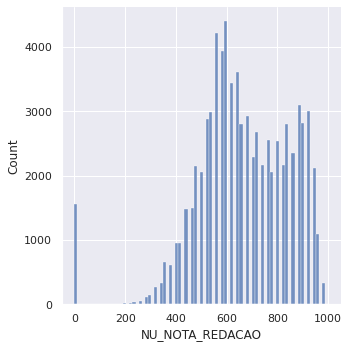

In [16]:
sns.displot(data_enem_mv['NU_NOTA_REDACAO'])

In [17]:
redacao_maior_0=data_enem_mv[data_enem_mv['NU_NOTA_REDACAO']>0]

Os  registros com nota igual a 0 foram eliminados para não impactarem na analise. Normalmente são alunos que não compareceram ao exame

In [18]:
redacao_maior_0.describe()

,NU_ANO,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,...,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,76665.0,76665.000000,76665.000000,76665.000000,76665.0,76665.0,76665.0,76665.0,76665.000000,76665.000000,...,76665.000000,76665.000000,76665.000000,76665.0,76665.000000,76665.000000,76665.000000,76665.000000,76665.000000,76665.000000
mean,2021.0,4.032844,1.701494,1.463745,1.0,1.0,1.0,1.0,914.309855,884.992669,...,529.636583,508.664141,537.324972,1.0,127.978086,152.090785,125.843866,140.646710,130.640840,677.200287
std,0.0,2.952137,0.653134,3.131596,0.0,0.0,0.0,0.0,19.324663,22.732429,...,93.874597,77.343501,112.480468,0.0,26.544408,39.041555,30.988748,32.933615,56.023278,160.094242
min,2021.0,1.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,909.000000,879.000000,...,0.000000,0.000000,0.000000,1.0,0.000000,40.000000,0.000000,0.000000,0.000000,40.000000
25%,2021.0,2.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,910.000000,880.000000,...,456.200000,454.600000,445.200000,1.0,120.000000,120.000000,100.000000,120.000000,100.000000,560.000000
50%,2021.0,3.000000,2.000000,0.000000,1.0,1.0,1.0,1.0,911.000000,881.000000,...,532.100000,510.800000,515.800000,1.0,120.000000,140.000000,120.000000,140.000000,140.000000,660.000000
75%,2021.0,5.000000,2.000000,1.000000,1.0,1.0,1.0,1.0,912.000000,882.000000,...,597.000000,563.100000,616.200000,1.0,160.000000,200.000000,140.000000,160.000000,180.000000,820.000000
max,2021.0,20.000000,4.000000,15.000000,1.0,1.0,1.0,1.0,1014.000000,1002.000000,...,832.500000,794.200000,953.100000,1.0,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000


/home/marcus-fortes/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_REDACAO', ylabel='Density'>

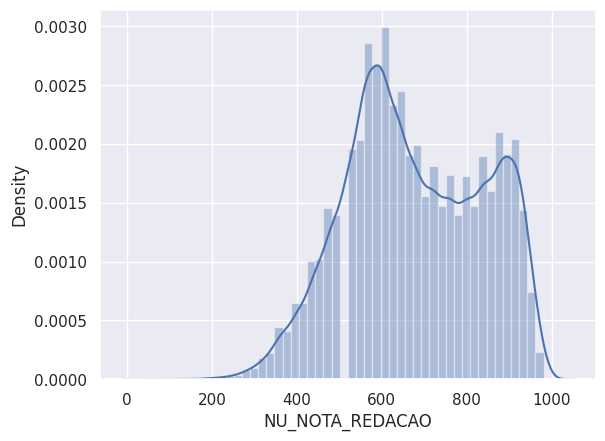

In [19]:
sns.distplot(redacao_maior_0['NU_NOTA_REDACAO'])

In [20]:
redacao_maior_0['NU_NOTA_REDACAO'].describe()

count    76665.000000
mean       677.200287
std        160.094242
min         40.000000
25%        560.000000
50%        660.000000
75%        820.000000
max       1000.000000
Name: NU_NOTA_REDACAO, dtype: float64

Observando os valores das notas da redação, vemos que há uma disparidade muito grande com relação à nota mais baixa, a nota no primeiro quartil e a média. A menor nota é muito menor que o primeiro quartil(12x menor) e 17x menor do que a média.) Dessa forma vamos eliminar as notas inferiores a 450. 
O governo já estabeleceu que a nota mímina na redação para ingressar no FIES, a partir de 2022, será 450, inclusive para participção em alguns programas de bolsas de estudo usam essa referência. Então o parâmetro é suficiente para manter notas que atestam minimamente uma boa capacidade de fazer a redação.
Portal do Mec abordando notas
http://portal.mec.gov.br/component/content/article?id=84461
Notícia a respeito do critério mínimo de 450 para a nota da redação
https://fdr.com.br/2020/10/14/veja-nota-minima-da-redacao-do-enem-exigida-para-inscricao-no-fies/
Abaixo seguem as notas mínimas registradas nas provas. Fonte Brasil Escola (Uol)
https://vestibular.brasilescola.uol.com.br/enem/enem-2021-veja-as-medias-e-notas-maximas-e-minimas/352322.html

<table style="width:600px" cellspacing="1" cellpadding="1" border="2" align="center">
	<tbody>
		<tr>
			<td style="background-color:#66ff00; text-align:center"><strong>Provas</strong></td>
			<td style="background-color:#66ff00; text-align:center"><strong>Proficiência<br>
			média</strong></td>
			<td style="background-color:#66ff00; text-align:center"><strong>Nota mínima</strong></td>
			<td style="background-color:#66ff00; text-align:center"><strong>Nota máxima</strong></td>
		</tr>
		<tr>
			<td style="text-align:center">Linguagens</td>
			<td style="text-align:center">501,83</td>
			<td style="text-align:center">295,2</td>
			<td style="text-align:center">826,1</td>
		</tr>
		<tr>
			<td style="background-color:#dddddd; text-align:center">Ciências Humanas</td>
			<td style="background-color:#dddddd; text-align:center">519,61</td>
			<td style="background-color:#dddddd; text-align:center">311,6</td>
			<td style="background-color:#dddddd; text-align:center">846,9</td>
		</tr>
		<tr>
			<td style="text-align:center">Ciências da Natureza</td>
			<td style="text-align:center">491,05</td>
			<td style="text-align:center">307,6</td>
			<td style="text-align:center">867,1</td>
		</tr>
		<tr>
			<td style="background-color:#dddddd; text-align:center">Matemática</td>
			<td style="background-color:#dddddd; text-align:center">533,72</td>
			<td style="background-color:#dddddd; text-align:center">310,4</td>
			<td style="background-color:#dddddd; text-align:center">953,1</td>
		</tr>
	</tbody>
</table>

In [21]:
q  = redacao_maior_0['NU_NOTA_REDACAO'].quantile(0.0025)
data_redacao = redacao_maior_0[redacao_maior_0['NU_NOTA_REDACAO']>450]
data_redacao.describe(include='all')

,NU_ANO,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,...,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q024,Q025
count,71012.0,71012.000000,71012.000000,71012.000000,71012.0,71012.0,71012.0,71012.0,71012.000000,71012.000000,...,71012.000000,71012.0,71012.000000,71012.000000,71012.000000,71012.000000,71012.000000,71012.000000,71012,71012
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,B
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30292,64906
mean,2021.0,3.978595,1.696065,1.464879,1.0,1.0,1.0,1.0,914.251436,884.924717,...,543.715557,1.0,130.673689,156.442291,129.774968,143.913423,139.257309,700.061680,NaN,NaN
std,0.0,2.879643,0.652649,3.096627,0.0,0.0,0.0,0.0,19.183557,22.562372,...,112.931621,0.0,24.906967,36.173834,28.083008,31.441156,48.209704,142.745079,NaN,NaN
min,2021.0,1.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,909.000000,879.000000,...,0.000000,1.0,40.000000,40.000000,40.000000,60.000000,0.000000,460.000000,NaN,NaN
25%,2021.0,2.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,910.000000,880.000000,...,451.100000,1.0,120.000000,120.000000,120.000000,120.000000,100.000000,580.000000,NaN,NaN
50%,2021.0,3.000000,2.000000,0.000000,1.0,1.0,1.0,1.0,911.000000,881.000000,...,524.400000,1.0,120.000000,160.000000,120.000000,140.000000,140.000000,680.000000,NaN,NaN
75%,2021.0,4.000000,2.000000,1.000000,1.0,1.0,1.0,1.0,912.000000,882.000000,...,623.900000,1.0,160.000000,200.000000,140.000000,160.000000,180.000000,820.000000,NaN,NaN


/home/marcus-fortes/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_REDACAO', ylabel='Density'>

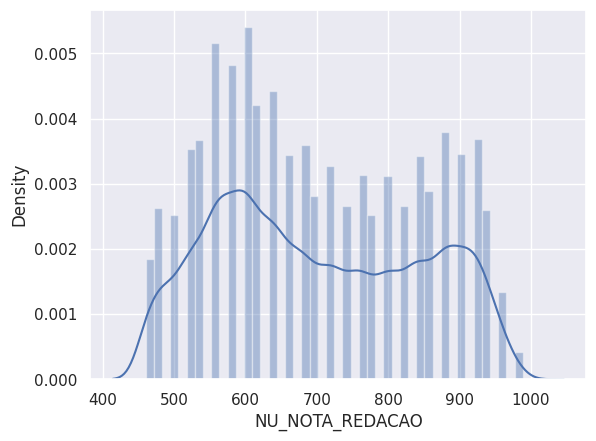

In [22]:
sns.distplot(data_redacao['NU_NOTA_REDACAO'])

In [23]:
#data_redacao_old = data_redacao.copy()
#data_redacao = data_redacao[(data_redacao['NU_NOTA_REDACAO']>490)&(data_redacao['NU_NOTA_REDACAO']<800)]
#sns.distplot(data_redacao['NU_NOTA_REDACAO'])

<h3>Analisando as notas de matemática</h3>

/home/marcus-fortes/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='Density'>

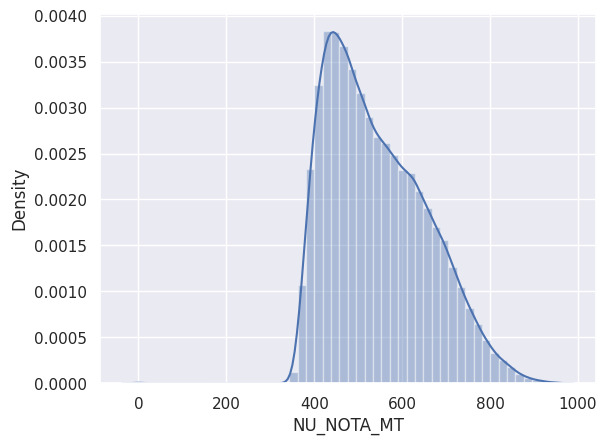

In [24]:
sns.distplot(data_redacao['NU_NOTA_MT'])

In [25]:
data_redacao['NU_NOTA_MT'].describe()

count    71012.000000
mean       543.715557
std        112.931621
min          0.000000
25%        451.100000
50%        524.400000
75%        623.900000
max        953.100000
Name: NU_NOTA_MT, dtype: float64

Vemos que temos algumas notas 0. Vamos também remover essas notas muito baixas

In [26]:
data_redacao[data_redacao['NU_NOTA_MT']<310.4]

,NU_ANO,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,...,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q024,Q025
5617,2021,2,2,0,1,1,1,1,912.0,882.0,...,0.0,1.0,180.0,200.0,180.0,200.0,200.0,960.0,B,B
13362,2021,4,1,1,1,1,1,1,910.0,879.0,...,0.0,1.0,120.0,120.0,120.0,120.0,80.0,560.0,A,A
18263,2021,4,2,0,1,1,1,1,1014.0,1000.0,...,0.0,1.0,100.0,120.0,80.0,100.0,140.0,540.0,A,B
29704,2021,10,1,7,1,1,1,1,1013.0,1002.0,...,0.0,1.0,100.0,160.0,120.0,140.0,60.0,580.0,B,B
66478,2021,1,3,0,1,1,1,1,911.0,880.0,...,0.0,1.0,160.0,200.0,160.0,200.0,200.0,920.0,A,A
74725,2021,15,1,15,1,1,1,1,1012.0,999.0,...,0.0,1.0,120.0,120.0,80.0,120.0,20.0,460.0,B,A
84619,2021,3,2,0,1,1,1,1,909.0,881.0,...,0.0,1.0,120.0,120.0,120.0,140.0,180.0,680.0,A,B
86420,2021,2,2,0,1,1,1,1,1011.0,1001.0,...,0.0,1.0,140.0,120.0,120.0,120.0,40.0,540.0,D,B
97713,2021,2,2,0,1,1,1,1,909.0,881.0,...,0.0,1.0,160.0,120.0,180.0,160.0,140.0,760.0,D,B
98370,2021,3,2,0,1,1,1,1,912.0,882.0,...,0.0,1.0,120.0,180.0,100.0,100.0,120.0,620.0,B,B


O Inep considerou que a nota mínima que demonstra proficiêcia em matemática é 310.4. Vamos então eliminar os registros inferiores à proficiência mínima para que eles não interfiram nos resutados https://vestibular.brasilescola.uol.com.br/enem/enem-2021-veja-as-medias-e-notas-maximas-e-minimas/352322.html

In [27]:
data_redacao_matematica = data_redacao[data_redacao['NU_NOTA_MT']>310.4]

In [28]:
data_redacao_matematica.describe(include="all")

,NU_ANO,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,...,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q024,Q025
count,71001.0,71001.000000,71001.000000,71001.000000,71001.0,71001.0,71001.0,71001.0,71001.000000,71001.000000,...,71001.000000,71001.0,71001.000000,71001.000000,71001.000000,71001.000000,71001.000000,71001.000000,71001,71001
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,B
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30288,64898
mean,2021.0,3.978536,1.696047,1.464782,1.0,1.0,1.0,1.0,914.246278,884.918635,...,543.799793,1.0,130.674216,156.443149,129.775637,143.914593,139.261137,700.068731,NaN,NaN
std,0.0,2.879415,0.652658,3.096341,0.0,0.0,0.0,0.0,19.170821,22.547391,...,112.737387,0.0,24.906310,36.173867,28.082104,31.440437,48.206603,142.742142,NaN,NaN
min,2021.0,1.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,909.000000,879.000000,...,334.100000,1.0,40.000000,40.000000,40.000000,60.000000,0.000000,460.000000,NaN,NaN
25%,2021.0,2.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,910.000000,880.000000,...,451.100000,1.0,120.000000,120.000000,120.000000,120.000000,100.000000,580.000000,NaN,NaN
50%,2021.0,3.000000,2.000000,0.000000,1.0,1.0,1.0,1.0,911.000000,881.000000,...,524.400000,1.0,120.000000,160.000000,120.000000,140.000000,140.000000,680.000000,NaN,NaN
75%,2021.0,4.000000,2.000000,1.000000,1.0,1.0,1.0,1.0,912.000000,882.000000,...,624.000000,1.0,160.000000,200.000000,140.000000,160.000000,180.000000,820.000000,NaN,NaN


In [29]:
data_redacao_matematica['NU_NOTA_MT'].describe()

count    71001.000000
mean       543.799793
std        112.737387
min        334.100000
25%        451.100000
50%        524.400000
75%        624.000000
max        953.100000
Name: NU_NOTA_MT, dtype: float64

/home/marcus-fortes/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='Density'>

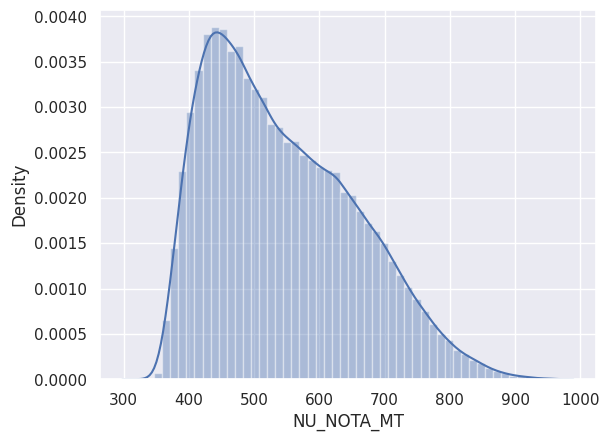

In [30]:
sns.distplot(data_redacao_matematica['NU_NOTA_MT'])

Agora o tratamento para a prova de Linguagens e códigos

In [31]:
data_redacao_matematica['NU_NOTA_LC'].describe()

count    71001.000000
mean       514.738666
std         75.039266
min          0.000000
25%        463.400000
50%        516.500000
75%        567.200000
max        794.200000
Name: NU_NOTA_LC, dtype: float64

/home/marcus-fortes/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_LC', ylabel='Density'>

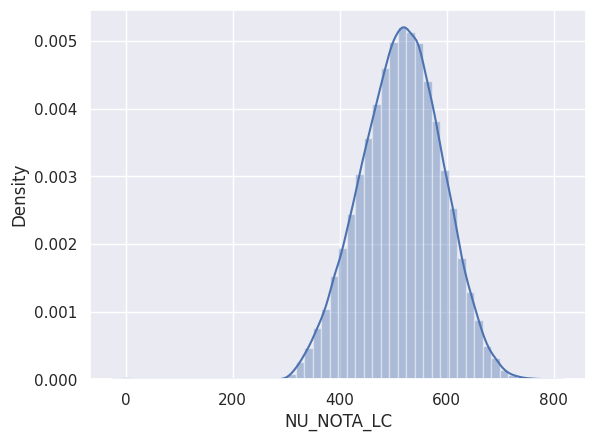

In [32]:
sns.distplot(data_redacao_matematica['NU_NOTA_LC'])

In [33]:
data_redacao_mt_lc=data_redacao_matematica[data_redacao_matematica['NU_NOTA_LC']>295.2]

/home/marcus-fortes/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_LC', ylabel='Density'>

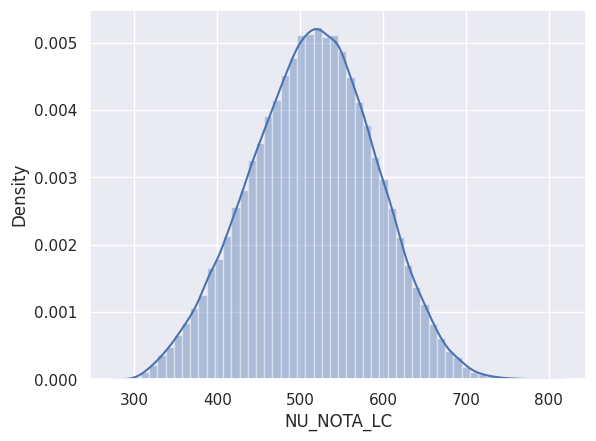

In [34]:
sns.distplot(data_redacao_mt_lc['NU_NOTA_LC'])

Tratamento das notas de ciências humanas

In [35]:
data_redacao_mt_lc['NU_NOTA_CH'].describe()

count    70994.000000
mean       536.049084
std         92.500889
min          0.000000
25%        465.600000
50%        539.700000
75%        602.000000
max        832.500000
Name: NU_NOTA_CH, dtype: float64

/home/marcus-fortes/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_CH', ylabel='Density'>

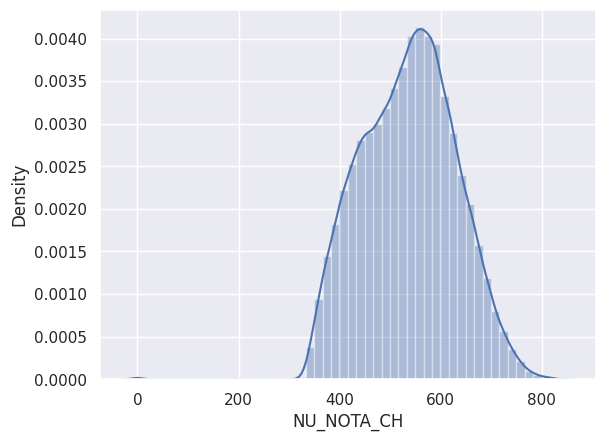

In [36]:
sns.distplot(data_redacao_mt_lc['NU_NOTA_CH'])

In [37]:
data_redacao_mt_lc_ch=data_redacao_mt_lc[data_redacao_mt_lc['NU_NOTA_CH']>311.6]

/home/marcus-fortes/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_CH', ylabel='Density'>

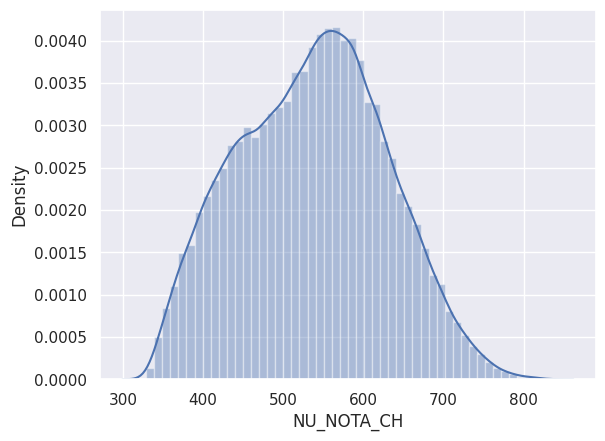

In [38]:
sns.distplot(data_redacao_mt_lc_ch['NU_NOTA_CH'])

Tratamento das notas de ciências da natureza

In [39]:
data_redacao_mt_lc_ch['NU_NOTA_CN'].describe()

count    70967.000000
mean       497.727170
std         82.098936
min        339.900000
25%        435.800000
50%        486.100000
75%        552.300000
max        856.600000
Name: NU_NOTA_CN, dtype: float64

/home/marcus-fortes/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_CN', ylabel='Density'>

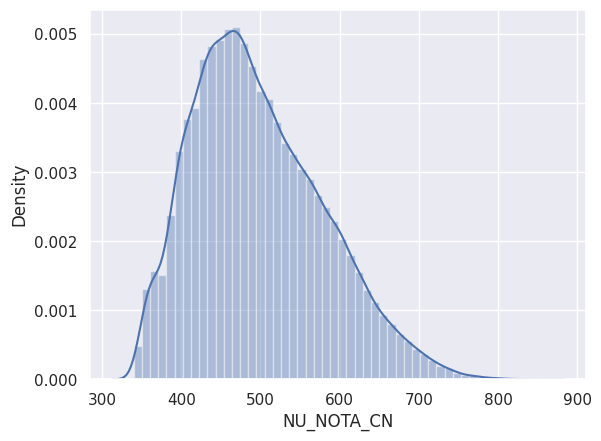

In [40]:
sns.distplot(data_redacao_mt_lc_ch['NU_NOTA_CN'])

In [41]:
data_redacao_mt_lc_ch_cn=data_redacao_mt_lc_ch[data_redacao_mt_lc_ch['NU_NOTA_CN']>307.6]

/home/marcus-fortes/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_CN', ylabel='Density'>

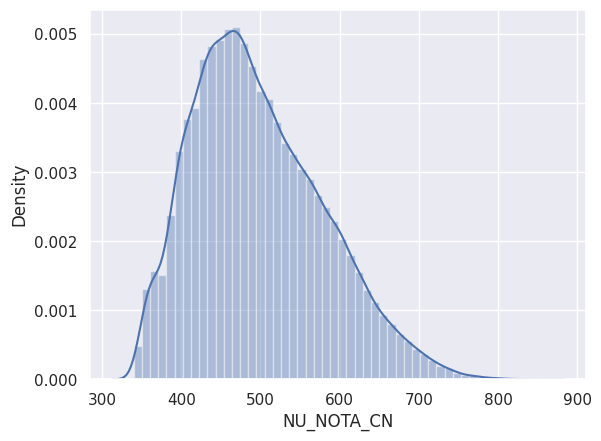

In [42]:
sns.distplot(data_redacao_mt_lc_ch_cn['NU_NOTA_CN'])

In [43]:
data_redacao_mt_lc_ch_cn_final= data_redacao_mt_lc_ch_cn.reset_index(drop=True)

In [44]:
data_redacao_mt_lc_ch_cn_final.describe()

,NU_ANO,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,...,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,70967.0,70967.000000,70967.000000,70967.000000,70967.0,70967.0,70967.0,70967.0,70967.000000,70967.000000,...,70967.000000,70967.000000,70967.000000,70967.0,70967.000000,70967.000000,70967.000000,70967.000000,70967.000000,70967.000000
mean,2021.0,3.978539,1.695971,1.464892,1.0,1.0,1.0,1.0,914.242394,884.913918,...,536.253029,514.807749,543.815506,1.0,130.677075,156.451872,129.778911,143.919568,139.267829,700.095256
std,0.0,2.879550,0.652609,3.096441,0.0,0.0,0.0,0.0,19.161333,22.536060,...,91.925527,74.861181,112.740427,0.0,24.906263,36.172799,28.083790,31.443611,48.208025,142.747377
min,2021.0,1.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,909.000000,879.000000,...,328.900000,298.000000,334.100000,1.0,40.000000,40.000000,40.000000,60.000000,0.000000,460.000000
25%,2021.0,2.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,910.000000,880.000000,...,465.700000,463.400000,451.100000,1.0,120.000000,120.000000,120.000000,120.000000,100.000000,580.000000
50%,2021.0,3.000000,2.000000,0.000000,1.0,1.0,1.0,1.0,911.000000,881.000000,...,539.700000,516.600000,524.400000,1.0,120.000000,160.000000,120.000000,140.000000,140.000000,680.000000
75%,2021.0,4.000000,2.000000,1.000000,1.0,1.0,1.0,1.0,912.000000,882.000000,...,602.000000,567.200000,624.000000,1.0,160.000000,200.000000,140.000000,160.000000,180.000000,820.000000
max,2021.0,20.000000,4.000000,15.000000,1.0,1.0,1.0,1.0,1014.000000,1002.000000,...,832.500000,794.200000,953.100000,1.0,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000


Foram removido 2904 registros que eram problemáticos: notas muito abaixo, registros inválidos, alunos faltantes. O que se espera é que os mais representativos sejam aproveitados para a analise

In [45]:
data_redacao_mt_lc_ch_cn_final[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,505.9,551.8,498.3,461.5,560.0
1,580.7,678.9,638.9,659.5,780.0
2,497.7,532.4,457.6,582.6,780.0
3,487.4,476.5,450.7,493.4,520.0
4,650.9,617.9,631.7,796.7,980.0
...,...,...,...,...,...
70962,424.5,527.6,516.4,561.0,680.0
70963,482.4,487.3,433.0,499.2,560.0
70964,539.8,612.6,605.5,612.0,640.0
70965,456.8,536.1,549.4,483.5,820.0


In [46]:
notas_analise_1=data_redacao_mt_lc_ch_cn_final[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]]

In [47]:
data_box_plot = pd.DataFrame(data=notas_analise_1.values, columns = ['Ciencias\nNaturais','Ciencias\nHumanas','Linguagens\ne Códigos','Matematica','Redacao'])

In [48]:
data_box_plot.head()

,Ciencias\nNaturais,Ciencias\nHumanas,Linguagens\ne Códigos,Matematica,Redacao
0,505.9,551.8,498.3,461.5,560.0
1,580.7,678.9,638.9,659.5,780.0
2,497.7,532.4,457.6,582.6,780.0
3,487.4,476.5,450.7,493.4,520.0
4,650.9,617.9,631.7,796.7,980.0


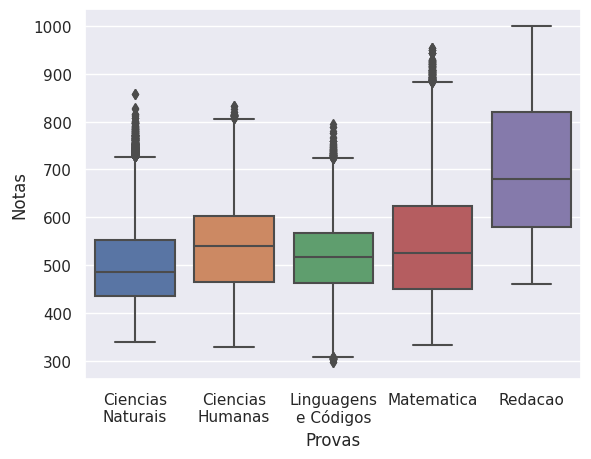

In [49]:
sns.boxplot(x="variable", y="value", data=pd.melt(data_box_plot))
sns.set(rc={"figure.figsize":(8, 10)}) 
plt.xlabel("Provas")
plt.ylabel("Notas")

plt.show()

In [50]:
from sklearn.linear_model import LinearRegression
# Warning 
from yellowbrick.regressor import ResidualsPlot 

In [77]:
x_mat = notas_analise_1["NU_NOTA_MT"].values
y_red = notas_analise_1["NU_NOTA_REDACAO"].values

In [78]:
x_mat.mean()

543.8155057984698

In [80]:
correlacao = np.corrcoef(x_mat,y_red)
correlacao

array([[1.        , 0.54952039],
       [0.54952039, 1.        ]])

In [82]:
x_mat = x_mat.reshape(-1,1)

In [83]:
modelo = LinearRegression()
modelo.fit(x_mat,y_red)

LinearRegression()

In [84]:
modelo.intercept_

321.71901591134525

In [85]:
modelo.coef_

array([0.69578053])

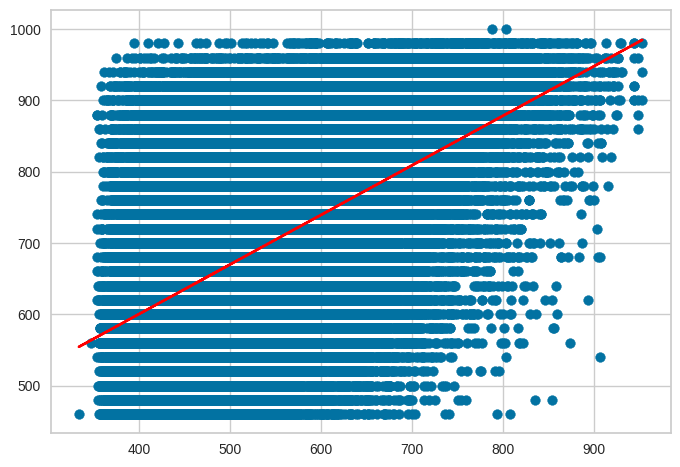

In [88]:
plt.scatter(x_mat,y_red)
plt.plot(x_mat,modelo.predict(x_mat),color='red')

In [97]:
data_2 = pd.read_csv("../file_part_01.csv",encoding='latin-1',sep=";")

In [100]:
data_2.columns=['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
       'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']

In [102]:
data_2_sample = data_2.iloc[[131,1521,2311,6031]]

In [135]:
data_2_sample_mat = data_2_sample[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']]

In [136]:
data_2_sample_mat

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
131,584.7,596.0,594.7,658.3,680.0
1521,441.0,659.7,505.8,416.9,740.0
2311,401.2,495.0,442.3,564.1,620.0
6031,480.5,463.2,547.3,572.0,840.0


In [119]:
for ds in data_2_sample['NU_NOTA_MT'].values:
    print(modelo.predict([[ds]]))
    

[779.75133734]
[611.78991794]
[714.20881162]
[719.70547779]


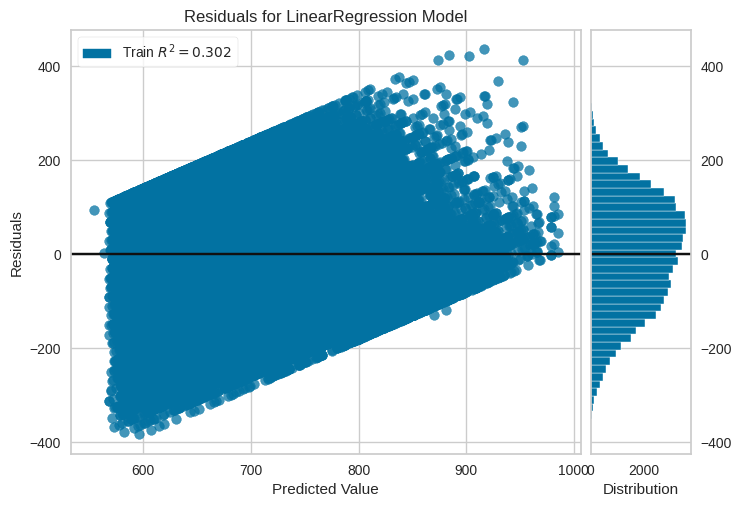

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [120]:
visualizador = ResidualsPlot(modelo)
visualizador.fit(x_mat, y_red)
visualizador.poof()

Analisando apenas a corelação entre as notas de redação e de matemática, as notas de matemártica apenas não dão uma boa base para se prever as notas da redação. Vamos agora tentar com as demais notas dos alunos em uma regressão multipla

In [121]:
import statsmodels.formula.api as sm

In [123]:
notas_analise_1.shape

(70967, 5)

In [124]:
notas_analise_1.head(10)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,505.9,551.8,498.3,461.5,560.0
1,580.7,678.9,638.9,659.5,780.0
2,497.7,532.4,457.6,582.6,780.0
3,487.4,476.5,450.7,493.4,520.0
4,650.9,617.9,631.7,796.7,980.0
5,378.5,502.7,487.7,514.9,680.0
6,537.6,476.5,553.2,509.7,560.0
7,462.2,402.2,403.3,445.8,540.0
8,487.9,419.9,488.2,553.1,720.0
9,516.3,524.3,496.3,608.5,880.0


In [126]:
x_cod_l = notas_analise_1['NU_NOTA_LC'].values

In [129]:
correlacao_2 = np.corrcoef(x_cod_l,y_red)
correlacao_2

array([[1.        , 0.53010428],
       [0.53010428, 1.        ]])

In [130]:
x_cod_l = x_cod_l.reshape(-1,1)

In [131]:
modelo_2 = LinearRegression()
modelo_2.fit(x_cod_l,y_red)

LinearRegression()

In [132]:
modelo_2.intercept_

179.71855324605224

In [133]:
modelo_2.coef_

array([1.01081754])

In [134]:
modelo_2.score(x_cod_l,y_red)

0.28101054330866904

In [137]:
previsoes_2 = modelo_2.predict(x_cod_l)
previsoes_2

array([683.40893363, 825.52987981, 642.26865974, ..., 791.76857396,
       735.06170995, 694.42684482])

In [147]:
modelo_ajustado = sm.ols(formula = 'NU_NOTA_REDACAO ~ NU_NOTA_LC + NU_NOTA_CN + NU_NOTA_CH + NU_NOTA_MT', data = notas_analise_1)
modelo_treinado = modelo_ajustado.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        NU_NOTA_REDACAO   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                 1.062e+04
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:53:14   Log-Likelihood:            -4.3613e+05
No. Observations:               70967   AIC:                         8.723e+05
Df Residuals:                   70962   BIC:                         8.723e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    130.0083      3.058     42.511      0.000     124.014     136.002
NU_NOTA_LC     0.2963      0.010     31.152      0.000       0.278       0.315
NU_NOTA_CN     0.2073      0.008     25.121      0.000       0.191       0.223
NU_NOTA_CH     0.2534      0.008     31.805      0.000       0.238       0.269
NU_NOTA_MT     0.3283      0.006     58.293      0.000       0.317       0.339
==============================================================================
Omnibus:                     1001.568   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.277
Skew:                           0.199   Prob(JB):                    3.09e-181
Kurtosis:                       2.649   Cond. No.                     7.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
x_mod_2 = notas_analise_1[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_LC"]].values

In [146]:
modelo_final = LinearRegression()
modelo_final.fit(x_mod_2,y_red)
modelo_final.score(x_mod_2,y_red)

0.34442149985929904

In [150]:
novo = np.array([441.0,659.7,505.8,416.9])
novo = novo.reshape(1,-1)
modelo_final.predict(novo)

array([697.97118985])